In [1]:
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.layers import Dense, Activation, Flatten, Convolution1D, Convolution2D, Dropout, MaxPooling1D,LSTM
import os
import tensorflow as tf
from keras.regularizers import l2
import warnings
import matplotlib.pyplot as plt
import random as rnd
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


2022-05-10 19:18:57.920008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-10 19:18:57.920038: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
'''
            ------- Amazon and Best Buy Electronics -------
This dataset presents the feedback received on the different electronic products.
The whole idea is to create neural networks predict 
Having been given different features, We want to predict weather a given brand is recommended (reviews.doRecommend = True) or a brand is not recommened (reviews.doRecommend = False)
'''

# Conditions to make sure that tensorflow GPU is up and running on machine.
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# Reading the dataset from the csv file using panadas.
dataset = pd.read_csv('Dataset/DatafinitiElectronicsProductData.csv')

# Printing the first 5 rows of the dataset
print(dataset.head())


Please install GPU version of TF


2022-05-10 19:19:15.727758: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-10 19:19:15.972099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 19:19:15.972983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-10 19:19:15.973263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such 

                     id       asins      brand  \
0  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
1  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
2  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
3  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
4  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   

                                          categories colors  \
0  Electronics,Computers,Computer Accessories,Key...  Black   
1  Electronics,Computers,Computer Accessories,Key...  Black   
2  Electronics,Computers,Computer Accessories,Key...  Black   
3  Electronics,Computers,Computer Accessories,Key...  Black   
4  Electronics,Computers,Computer Accessories,Key...  Black   

              dateAdded           dateUpdated                   dimension  \
0  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
1  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
2  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
3  2015-11-1

In [3]:
dataset = dataset.filter(['brand','manufacturer','reviews.text','reviews.title','reviews.doRecommend'])

In [4]:
dataset.head()

,brand,manufacturer,reviews.text,reviews.title,reviews.doRecommend
0,Microsoft,Microsoft,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,True
1,Microsoft,Microsoft,It's thin and light. I can type pretty easily ...,Nice,True
2,Microsoft,Microsoft,I love the new design the keys are spaced well...,New,True
3,Microsoft,Microsoft,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,True
4,Microsoft,Microsoft,"Our original keyboard was okay, but did not ha...",Nice improvement,True


In [10]:
dataset.dropna(inplace=True)
X = dataset.drop('reviews.doRecommend', axis = 1)
y = dataset['reviews.doRecommend']
# X_train.head()
X = dataset['reviews.text']

cv = CountVectorizer()
t = TfidfTransformer()
X = cv.fit_transform(X)
X = t.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
y_train, y_test = prepare_targets(y_train, y_test)

model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model = LogisticRegression(penalty="l2", solver="saga", C=100, max_iter=800).fit(X_train, y_train)
model.score(X_test, y_test)

0.8971807628524047


0.900497512437811

In [8]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=100)
    oe.fit(X_train[['brand','manufacturer']])
    X_train[['brand','manufacturer']] = oe.transform(X_train[['brand','manufacturer']])
    X_test[['brand','manufacturer']] = oe.transform(X_test[['brand','manufacturer']])
    cv = CountVectorizer()
    t = TfidfTransformer()
    vectorized = cv.fit_transform(X_train['reviews.text'])
    transformed = t.fit_transform(vectorized)
    X_train[['reviews.text']] = vectorized
    vectorized = cv.fit_transform(X_test['reviews.text'])
    transformed = t.fit_transform(vectorized)
    X_test[['reviews.text']] = vectorized
    return X_train, X_test

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X_train, X_test = prepare_inputs(X_train, X_test)
y_train, y_test = prepare_targets(y_train, y_test)


UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U12'), dtype('<U12')) -> None

In [9]:
model = MultinomialNB().fit(X_train, y_train)
model.score(X_test, y_test)

0.8971807628524047

Please install GPU version of TF


2022-05-10 19:32:25.125240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 19:32:25.125843: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


                     id       asins      brand  \
0  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
1  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
2  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
3  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
4  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   

                                          categories colors  \
0  Electronics,Computers,Computer Accessories,Key...  Black   
1  Electronics,Computers,Computer Accessories,Key...  Black   
2  Electronics,Computers,Computer Accessories,Key...  Black   
3  Electronics,Computers,Computer Accessories,Key...  Black   
4  Electronics,Computers,Computer Accessories,Key...  Black   

              dateAdded           dateUpdated                   dimension  \
0  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
1  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
2  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
3  2015-11-1

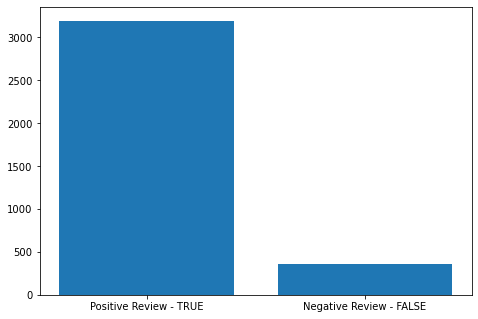

            brand                                         categories  \
0       Microsoft  Electronics,Computers,Computer Accessories,Key...   
1       Microsoft  Electronics,Computers,Computer Accessories,Key...   
2       Microsoft  Electronics,Computers,Computer Accessories,Key...   
3       Microsoft  Electronics,Computers,Computer Accessories,Key...   
4       Microsoft  Electronics,Computers,Computer Accessories,Key...   
...           ...                                                ...   
7291     Logitech  Electronics,Accessories & Supplies,Audio & Vid...   
7295  Peerless-AV  Office,Projectors & Presentation Equipment,Aud...   
7296  Peerless-AV  Office,Projectors & Presentation Equipment,Aud...   
7297  Peerless-AV  Office,Projectors & Presentation Equipment,Aud...   
7298  Peerless-AV  Office,Projectors & Presentation Equipment,Aud...   

     manufacturerNumber manufacturer  reviews.numHelpful  
0             RH7-00001    Microsoft                 0.0  
1             RH7

Epoch 1/50


 1/60 [..............................] - ETA: 34s - loss: 0.7585 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

39/60 [==================>...........] - ETA: 0s - loss: 0.7330 - accuracy: 0.9046 - mse: 0.0954 - mae: 0.0954 

60/60 [==============================] - 1s 5ms/step - loss: 0.7168 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.6812 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 2/50


 1/60 [..............................] - ETA: 0s - loss: 0.6641 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

39/60 [==================>...........] - ETA: 0s - loss: 0.6537 - accuracy: 0.9054 - mse: 0.0946 - mae: 0.0946

60/60 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.6184 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 3/50


 1/60 [..............................] - ETA: 0s - loss: 0.5719 - accuracy: 1.0000 - mse: 0.0000e+00 - mae: 0.0000e+00

34/60 [================>.............] - ETA: 0s - loss: 0.5929 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938        

60/60 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.5726 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 4/50


 1/60 [..............................] - ETA: 0s - loss: 0.5724 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

39/60 [==================>...........] - ETA: 0s - loss: 0.5487 - accuracy: 0.9022 - mse: 0.0978 - mae: 0.0978

60/60 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.5395 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 5/50


 1/60 [..............................] - ETA: 0s - loss: 0.4825 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

38/60 [==================>...........] - ETA: 0s - loss: 0.5062 - accuracy: 0.9112 - mse: 0.0888 - mae: 0.0888

60/60 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.5143 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 6/50


 1/60 [..............................] - ETA: 0s - loss: 0.5529 - accuracy: 0.8438 - mse: 0.1562 - mae: 0.1562

37/60 [=================>............] - ETA: 0s - loss: 0.4937 - accuracy: 0.8978 - mse: 0.1022 - mae: 0.1022

60/60 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4956 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 7/50


 1/60 [..............................] - ETA: 0s - loss: 0.4770 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

37/60 [=================>............] - ETA: 0s - loss: 0.4663 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

60/60 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4806 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 8/50


 1/60 [..............................] - ETA: 0s - loss: 0.4910 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

39/60 [==================>...........] - ETA: 0s - loss: 0.4412 - accuracy: 0.9143 - mse: 0.0857 - mae: 0.0857

60/60 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4689 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 9/50


 1/60 [..............................] - ETA: 0s - loss: 0.4405 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

36/60 [=================>............] - ETA: 0s - loss: 0.4381 - accuracy: 0.9054 - mse: 0.0946 - mae: 0.0946

60/60 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4596 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 10/50


 1/60 [..............................] - ETA: 0s - loss: 0.3500 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

36/60 [=================>............] - ETA: 0s - loss: 0.4112 - accuracy: 0.9175 - mse: 0.0825 - mae: 0.0825

60/60 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4519 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 11/50


 1/60 [..............................] - ETA: 0s - loss: 0.5087 - accuracy: 0.8438 - mse: 0.1562 - mae: 0.1562

39/60 [==================>...........] - ETA: 0s - loss: 0.3982 - accuracy: 0.9199 - mse: 0.0801 - mae: 0.0801

60/60 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4455 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 12/50


 1/60 [..............................] - ETA: 0s - loss: 0.4588 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

36/60 [=================>............] - ETA: 0s - loss: 0.4176 - accuracy: 0.9028 - mse: 0.0972 - mae: 0.0972

60/60 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4404 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 13/50


 1/60 [..............................] - ETA: 0s - loss: 0.3602 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

38/60 [==================>...........] - ETA: 0s - loss: 0.4050 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

60/60 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4358 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 14/50


 1/60 [..............................] - ETA: 0s - loss: 0.5521 - accuracy: 0.8125 - mse: 0.1875 - mae: 0.1875

39/60 [==================>...........] - ETA: 0s - loss: 0.3949 - accuracy: 0.9095 - mse: 0.0905 - mae: 0.0905

60/60 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4319 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 15/50


 1/60 [..............................] - ETA: 0s - loss: 0.2941 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

39/60 [==================>...........] - ETA: 0s - loss: 0.3846 - accuracy: 0.9127 - mse: 0.0873 - mae: 0.0873

60/60 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4286 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 16/50


 1/60 [..............................] - ETA: 0s - loss: 0.3963 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

39/60 [==================>...........] - ETA: 0s - loss: 0.3769 - accuracy: 0.9135 - mse: 0.0865 - mae: 0.0865

60/60 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4256 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 17/50


 1/60 [..............................] - ETA: 0s - loss: 0.3321 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

39/60 [==================>...........] - ETA: 0s - loss: 0.3709 - accuracy: 0.9159 - mse: 0.0841 - mae: 0.0841

60/60 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4230 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 18/50


 1/60 [..............................] - ETA: 0s - loss: 0.5566 - accuracy: 0.8125 - mse: 0.1875 - mae: 0.1875

39/60 [==================>...........] - ETA: 0s - loss: 0.3818 - accuracy: 0.9071 - mse: 0.0929 - mae: 0.0929

60/60 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4206 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 19/50


 1/60 [..............................] - ETA: 0s - loss: 0.2672 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

36/60 [=================>............] - ETA: 0s - loss: 0.3695 - accuracy: 0.9123 - mse: 0.0877 - mae: 0.0877

60/60 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4185 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 20/50


 1/60 [..............................] - ETA: 0s - loss: 0.6222 - accuracy: 0.7812 - mse: 0.2188 - mae: 0.2188

38/60 [==================>...........] - ETA: 0s - loss: 0.3810 - accuracy: 0.9046 - mse: 0.0954 - mae: 0.0954

60/60 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4166 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 21/50


 1/60 [..............................] - ETA: 0s - loss: 0.3754 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

39/60 [==================>...........] - ETA: 0s - loss: 0.3563 - accuracy: 0.9167 - mse: 0.0833 - mae: 0.0833

60/60 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4148 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 22/50


 1/60 [..............................] - ETA: 0s - loss: 0.2515 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

39/60 [==================>...........] - ETA: 0s - loss: 0.3651 - accuracy: 0.9103 - mse: 0.0897 - mae: 0.0897

60/60 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4131 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 23/50


 1/60 [..............................] - ETA: 0s - loss: 0.2511 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

36/60 [=================>............] - ETA: 0s - loss: 0.3449 - accuracy: 0.9201 - mse: 0.0799 - mae: 0.0799

60/60 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4116 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 24/50


 1/60 [..............................] - ETA: 0s - loss: 0.3727 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

39/60 [==================>...........] - ETA: 0s - loss: 0.3609 - accuracy: 0.9103 - mse: 0.0897 - mae: 0.0897

60/60 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4102 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 25/50


 1/60 [..............................] - ETA: 0s - loss: 0.2481 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

38/60 [==================>...........] - ETA: 0s - loss: 0.3545 - accuracy: 0.9128 - mse: 0.0872 - mae: 0.0872

60/60 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4088 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 26/50


 1/60 [..............................] - ETA: 0s - loss: 0.4338 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

39/60 [==================>...........] - ETA: 0s - loss: 0.3578 - accuracy: 0.9103 - mse: 0.0897 - mae: 0.0897

60/60 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4076 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 27/50


 1/60 [..............................] - ETA: 0s - loss: 0.4248 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

38/60 [==================>...........] - ETA: 0s - loss: 0.3653 - accuracy: 0.9054 - mse: 0.0946 - mae: 0.0946

60/60 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4063 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 28/50


 1/60 [..............................] - ETA: 0s - loss: 0.3004 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

35/60 [================>.............] - ETA: 0s - loss: 0.3603 - accuracy: 0.9071 - mse: 0.0929 - mae: 0.0929

60/60 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4052 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 29/50


 1/60 [..............................] - ETA: 0s - loss: 0.3565 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

39/60 [==================>...........] - ETA: 0s - loss: 0.3466 - accuracy: 0.9135 - mse: 0.0865 - mae: 0.0865

60/60 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4041 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 30/50


 1/60 [..............................] - ETA: 0s - loss: 0.3595 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

37/60 [=================>............] - ETA: 0s - loss: 0.3464 - accuracy: 0.9122 - mse: 0.0878 - mae: 0.0878

60/60 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4030 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 31/50


 1/60 [..............................] - ETA: 0s - loss: 0.4265 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

39/60 [==================>...........] - ETA: 0s - loss: 0.3910 - accuracy: 0.8902 - mse: 0.1098 - mae: 0.1098

60/60 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4020 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 32/50


 1/60 [..............................] - ETA: 0s - loss: 0.3551 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

39/60 [==================>...........] - ETA: 0s - loss: 0.3503 - accuracy: 0.9095 - mse: 0.0905 - mae: 0.0905

60/60 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4010 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 33/50


 1/60 [..............................] - ETA: 0s - loss: 0.4321 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

38/60 [==================>...........] - ETA: 0s - loss: 0.3409 - accuracy: 0.9137 - mse: 0.0863 - mae: 0.0863

60/60 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.4001 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 34/50


 1/60 [..............................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

37/60 [=================>............] - ETA: 0s - loss: 0.3429 - accuracy: 0.9122 - mse: 0.0878 - mae: 0.0878

60/60 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3992 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 35/50


 1/60 [..............................] - ETA: 0s - loss: 0.3535 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

39/60 [==================>...........] - ETA: 0s - loss: 0.3417 - accuracy: 0.9111 - mse: 0.0889 - mae: 0.0889

60/60 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3983 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 36/50


 1/60 [..............................] - ETA: 0s - loss: 0.6277 - accuracy: 0.7812 - mse: 0.2188 - mae: 0.2188

40/60 [===================>..........] - ETA: 0s - loss: 0.3416 - accuracy: 0.9117 - mse: 0.0883 - mae: 0.0883

60/60 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3974 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 37/50


 1/60 [..............................] - ETA: 0s - loss: 0.4128 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

39/60 [==================>...........] - ETA: 0s - loss: 0.3453 - accuracy: 0.9087 - mse: 0.0913 - mae: 0.0913

60/60 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3966 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 38/50


 1/60 [..............................] - ETA: 0s - loss: 0.1475 - accuracy: 1.0000 - mse: 0.0000e+00 - mae: 0.0000e+00

37/60 [=================>............] - ETA: 0s - loss: 0.3402 - accuracy: 0.9113 - mse: 0.0887 - mae: 0.0887        

60/60 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3958 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 39/50


 1/60 [..............................] - ETA: 0s - loss: 0.3480 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

39/60 [==================>...........] - ETA: 0s - loss: 0.3377 - accuracy: 0.9119 - mse: 0.0881 - mae: 0.0881

60/60 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3950 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 40/50


 1/60 [..............................] - ETA: 0s - loss: 0.3588 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

40/60 [===================>..........] - ETA: 0s - loss: 0.3333 - accuracy: 0.9133 - mse: 0.0867 - mae: 0.0867

60/60 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3942 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 41/50


 1/60 [..............................] - ETA: 0s - loss: 0.4164 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

39/60 [==================>...........] - ETA: 0s - loss: 0.3314 - accuracy: 0.9135 - mse: 0.0865 - mae: 0.0865

60/60 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3935 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 42/50


 1/60 [..............................] - ETA: 0s - loss: 0.2127 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

40/60 [===================>..........] - ETA: 0s - loss: 0.3475 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

60/60 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3927 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 43/50


 1/60 [..............................] - ETA: 0s - loss: 0.2021 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

39/60 [==================>...........] - ETA: 0s - loss: 0.3255 - accuracy: 0.9159 - mse: 0.0841 - mae: 0.0841

60/60 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3920 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 44/50


 1/60 [..............................] - ETA: 0s - loss: 0.2767 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

39/60 [==================>...........] - ETA: 0s - loss: 0.3380 - accuracy: 0.9095 - mse: 0.0905 - mae: 0.0905

60/60 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3913 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 45/50


 1/60 [..............................] - ETA: 0s - loss: 0.2088 - accuracy: 0.9688 - mse: 0.0312 - mae: 0.0312

39/60 [==================>...........] - ETA: 0s - loss: 0.3182 - accuracy: 0.9183 - mse: 0.0817 - mae: 0.0817

60/60 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3906 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 46/50


 1/60 [..............................] - ETA: 0s - loss: 0.2736 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

38/60 [==================>...........] - ETA: 0s - loss: 0.3654 - accuracy: 0.8964 - mse: 0.1036 - mae: 0.1036

60/60 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3899 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 47/50


 1/60 [..............................] - ETA: 0s - loss: 0.4029 - accuracy: 0.8750 - mse: 0.1250 - mae: 0.1250

36/60 [=================>............] - ETA: 0s - loss: 0.3321 - accuracy: 0.9106 - mse: 0.0894 - mae: 0.0894

60/60 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3893 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 48/50


 1/60 [..............................] - ETA: 0s - loss: 0.3401 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

40/60 [===================>..........] - ETA: 0s - loss: 0.3410 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

60/60 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3886 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 49/50


 1/60 [..............................] - ETA: 0s - loss: 0.2678 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

38/60 [==================>...........] - ETA: 0s - loss: 0.3223 - accuracy: 0.9145 - mse: 0.0855 - mae: 0.0855

60/60 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3880 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


Epoch 50/50


 1/60 [..............................] - ETA: 0s - loss: 0.2708 - accuracy: 0.9375 - mse: 0.0625 - mae: 0.0625

39/60 [==================>...........] - ETA: 0s - loss: 0.3382 - accuracy: 0.9071 - mse: 0.0929 - mae: 0.0929

60/60 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.9088 - mse: 0.0912 - mae: 0.0912 - val_loss: 0.3874 - val_accuracy: 0.8847 - val_mse: 0.1153 - val_mae: 0.1153


dict_keys(['loss', 'accuracy', 'mse', 'mae', 'val_loss', 'val_accuracy', 'val_mse', 'val_mae'])


Test loss: 0.3808062970638275
Test accuracy: 0.8876595497131348


INFO:tensorflow:Assets written to: savedNeuralNetwork/assets


 1/37 [..............................] - ETA: 21s - loss: 0.3373 - accuracy: 0.9062 - mse: 0.0938 - mae: 0.0938

37/37 [==============================] - ETA: 0s - loss: 0.3799 - accuracy: 0.8877 - mse: 0.1123 - mae: 0.1123 

37/37 [==============================] - 1s 1ms/step - loss: 0.3799 - accuracy: 0.8877 - mse: 0.1123 - mae: 0.1123


Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten_1 (Flatten)         (None, 5)                 0         


 dense_4 (Dense)             (None, 30)                180       


 dropout_3 (Dropout)         (None, 30)                0         


 dense_5 (Dense)             (None, 20)                620       


 dropout_4 (Dropout)         (None, 20)                0         


 dense_6 (Dense)             (None, 10)                210       


 dropout_5 (Dropout)         (None, 10)                0         


 dense_7 (Dense)             (None, 1)                 11        


Total params: 1,021


Trainable params: 1,021


Non-trainable params: 0


_________________________________________________________________


None


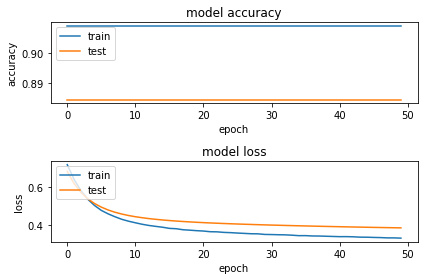

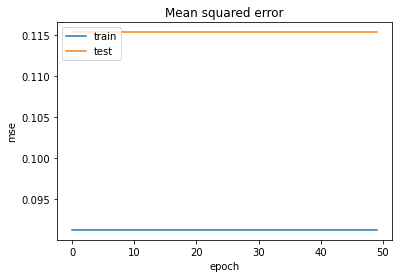

In [12]:

import numpy as np
import pandas as pd
import math
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.layers import Dense, Activation, Flatten, Convolution1D, Convolution2D, Dropout, MaxPooling1D,LSTM
import os
import tensorflow as tf
from keras.regularizers import l2
import warnings
import matplotlib.pyplot as plt
import random as rnd
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


'''
            ------- Amazon and Best Buy Electronics -------
This dataset presents the feedback received on the different electronic products.
The whole idea is to create neural networks predict 
Having been given different features, We want to predict weather a given brand is recommended (reviews.doRecommend = True) or a brand is not recommened (reviews.doRecommend = False)
'''

# Conditions to make sure that tensorflow GPU is up and running on machine.
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# Reading the dataset from the csv file using panadas.
dataset = pd.read_csv('Dataset/DatafinitiElectronicsProductData.csv')

# Printing the first 5 rows of the dataset
print(dataset.head())


# Creating the dataset with the needed columns.
# add  'reviews.rating' for a better accuracy.
new_dataset = dataset.filter(['brand', 'categories', 'manufacturerNumber', 'manufacturer', 'reviews.numHelpful', 'reviews.doRecommend' ], axis = 1)

# Dataset Util.
# Creating pyPlots.
# Data analysis.

def removeNanFromRecommendedReviews(dataset):
    return dataset.dropna()

new_dataset = removeNanFromRecommendedReviews(new_dataset)

print(new_dataset.head())


def getAllTheDifferentBrands(dataset):
    brands = set(dataset['brand'])

    return brands

print("All the brands that have been reviewed at least once.")
print(getAllTheDifferentBrands(new_dataset))

def countAllTrueByBrand(dataset,givenBrand):
    counterTrue = 0
    contor = 1
    ''' NOT WORKING CORECTLY '''
    for row in dataset['brand']:
        contor = contor + 1
        if str(row) == givenBrand:
            print(str(dataset['reviews.doRecommend'][contor]))
            if str(dataset['reviews.doRecommend'][contor]) == True:
                counterTrue = counterTrue + 1
    return counterTrue

print("Number of positive reviews each brand has recieve:")
brands = getAllTheDifferentBrands(new_dataset)
#for brand in getAllTheDifferentBrands(new_dataset):
    #print(countAllTrueByBrand(new_dataset,brand))


def countAllFalseByBrand(dataset,givenBrand):
    counterFalse = 0
    ''' NOT WORKING CORECTLY '''
    for row in dataset:
        if str(row['brand']) == givenBrand:
            if row['reviews.doRecommend'] == True:
                counterFalse = counterFalse + 1

    return counterFalse



# Number of true's and false's in all the dataset.
def trueFalsePyData(dataset):
    counterTrue = 0
    counterFalse = 0

    for rowValue in dataset['reviews.doRecommend']:
        if rowValue == True:
            counterTrue = counterTrue + 1
        else:
            counterFalse = counterFalse + 1
    return counterTrue,counterFalse

print(trueFalsePyData(new_dataset))

def trueFalseCounterDataPlot(dataset):
    fig = plt.figure()
    ''' NOT WORKING FULLY '''
    ax = fig.add_axes([0, 0, 1, 1])
    trueFalse = ['Positive Review - TRUE', 'Negative Review - FALSE']
    counters = trueFalsePyData(dataset)
    ax.bar(trueFalse, counters)
    plt.show()

trueFalseCounterDataPlot(new_dataset)


# Number of true's by brand.
def trueBasedOnBrandPlot(dataset):
    plt.figure(figsize=(10, 4))
    plt.hlines(y=dataset['brands'], xmin=0, xmax=CountAllTrueByBrand(dataset,dataset['brands']), color='slateblue')
    plt.plot(dataset[''], dataset['brands'], 'o', color='slateblue')
    plt.title('Continents by area', fontsize=27)
    plt.xlabel('Area, mln km2', fontsize=19)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0, None)
    plt.tick_params(left=False)
    #sns.despine(left=True)
    plt.show()

def falseBasedOnBrand(dataset):
    pass


def prepare_inputs(X_train, X_test):

    oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=100)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)

    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):

    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)

    return y_train_enc, y_test_enc


def plot(history):
    """
    Se creeaza numeroase grafice pe modelul retelei neuronale creat,
    :param history: reprezinta modelul retelei neuronale artificiale.
    :return: grafic pentru accuratetea atat pentru valorile de antrenare cat si cele de testare.
             grafic pentru functia de pierdere atat pentru valorile de antrenare cat si cele de testare.
             grafic pentru eroarea patratica medie atat pentru valorile de antrenare cat si cele de testare.
    Pe aceste grafice se poate vedea foarte usor daca modelul retelei neuronale este eficace sau nu.
    """
    plt.figure(1)

    plt.subplot(211)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.subplot(212)
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.tight_layout()

    plt.show()

    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Mean squared error')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


X = new_dataset.drop('reviews.doRecommend', axis = 1)
Y = new_dataset['reviews.doRecommend']


print(X)
print(Y)

# Splitting the dataset in train and test data with train_test_split from sklearn.model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

X_train,X_test = prepare_inputs(X_train,X_test)
Y_train, Y_test = prepare_targets(Y_train, Y_test)

print(X_train)
print(len(Y_train))
# Neural Network model with sckit-Learn lib ALGOS.

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, Y_train)


logreg_clf.predict(X_test)

score = logreg_clf.score(X_test, Y_test)
print("Accuracy Score with Sklearn LogisticRegression Algorithm")
print(score)



# Neural Network model from scratch with keras lib.

model = Sequential()

# model.add(Convolution1D(filters=2, kernel_size=1, padding='SAME', activation='sigmoid'))
model.add(Flatten(input_shape=(5,)))
# model.add(Dense(24, activation='relu', kernel_regularizer=l2(0.02), bias_regularizer=l2(0.02), kernel_initializer='LecunNormal', bias_initializer='zeros'))
# model.add(Dropout(0.2))
model.add(Dense(30, activation='softmax', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(20, activation='softmax'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.001, nesterov=True, decay=1e-8, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["accuracy", "mse", "mae"])

history = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose='auto', validation_split=0.2, shuffle=True)

# Accuratetea ar putea fi scrisa ca numarul de predictii corecte / numarul total de predictii.
print(history.history.keys())

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("savedNeuralNetwork")

# Se salveaza modelul neuronal.
reconstructed_model = keras.models.load_model("savedNeuralNetwork")

# Se verifica modelul.
np.testing.assert_allclose(model.predict(X_test), reconstructed_model.predict(X_test))

# Modelul reconstruit este deja compilat si a retinut optimizatorul
# Antrenamentul se poată relua:
reconstructed_model.fit(X_test, Y_test)

print(model.summary())

plot(history)

<AxesSubplot:xlabel='brand,reviews.doRecommend'>

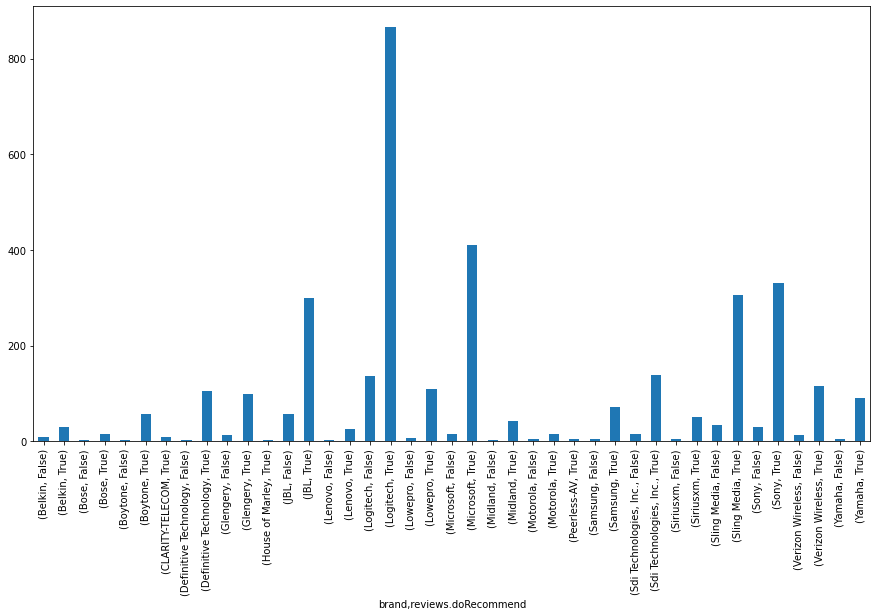

In [25]:
new_dataset.head()
brands = new_dataset.groupby(['brand','reviews.doRecommend'])
brands['brand'].count().plot(kind="bar",figsize=(15,8))

<AxesSubplot:xlabel='brand'>

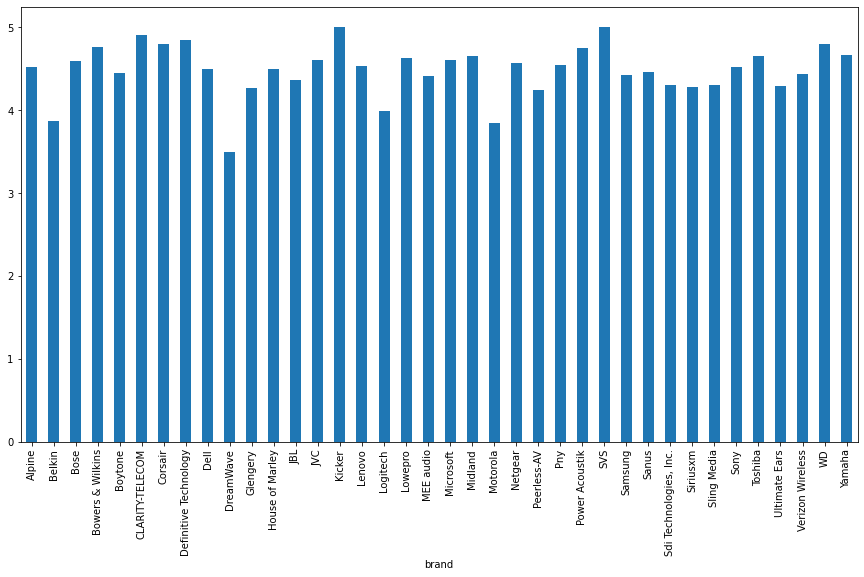

In [31]:
dataset.groupby(['brand'])['reviews.rating'].mean().plot(kind="bar",figsize=(15,8))
